In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr
import h5py
from tqdm import tqdm
import time

from RPLB_acc_NoSTC import RPLB_acc_NoSTC
from RPLB_acc_LC import RPLB_acc_LC
from RPLB_acc_NoSTCApril import RPLB_acc_NoSTCApril
from RPLB_acc_LCApril import RPLB_acc_LCApril

In [2]:
c = 2.9979e8
lambda_0 = 1800e-9  # central wavelength
omega_0 = 2*np.pi*c/lambda_0

s = 57.5
tau_FWHM = np.sqrt(2)*s*np.sqrt(2**(2/(s+1))-1)/omega_0
tau_0 = s*np.sqrt(np.exp(2/(s+1))-1)/omega_0

NA = 0.1
half_angle = np.arcsin(NA)
a = 2/(np.sin(half_angle)*np.tan(half_angle)*2*np.pi/lambda_0)  # set confocal parameter
w_0 = 2/(np.tan(half_angle)*2*np.pi/lambda_0)  # set beam waist
z_R = (omega_0*w_0**2)/(2*c)
print('{0:.3g}'.format(1e6*w_0))

P = 50e12  # FL power
Psi_0 = 0.0*np.pi
t_0 = -10*tau_0

5.7


37286936.48344245
37286931.774066865
37778100.25378249
34876983.10325662


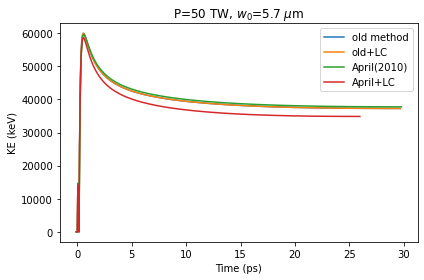

In [3]:
t, temp, temp, KE = RPLB_acc_NoSTC(lambda_0, tau_0, w_0, P, Psi_0, 0.0, t_0, 0.0, 0.0)
t_LC, temp, temp, KE_LC = RPLB_acc_LC(lambda_0, tau_0, w_0, P, Psi_0, 0.0, 0.0, t_0, 0.0, 0.0, 0.0)
t_April, temp, temp, KE_April = RPLB_acc_NoSTCApril(lambda_0, s, a, P, Psi_0, t_0, 0.0, 0.0)
t_April_LC, temp, temp, KE_April_LC = RPLB_acc_LCApril(lambda_0, s, a, P, Psi_0, 0.0, 0.0, t_0, 0.0, 0.0, 0.0)

print(KE[-1])
print(KE_LC[-1])
print(KE_April[-1])
print(KE_April_LC[-1])

plt.plot(t/1e-12, KE/1e3)
plt.plot(t_LC/1e-12, KE_LC/1e3)
plt.plot(t_April/1e-12, KE_April/1e3)
plt.plot(t_April_LC/1e-12, KE_April_LC/1e3)
plt.legend(['old method', 'old+LC', 'April(2010)', 'April+LC'], loc=0)
plt.title('P='+'{0:.3g}'.format(P/1e12)+' TW, $w_0$='+'{0:.3g}'.format(1e6*w_0)+r' $\mu$m')
plt.xlabel('Time (ps)')
plt.ylabel('KE (keV)')
plt.tight_layout()

44960860.75606686
43748641.088497885


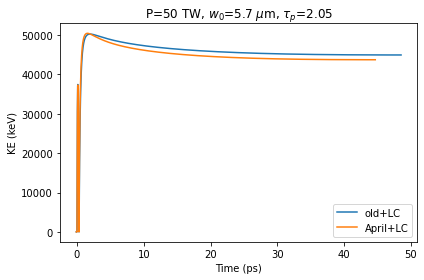

In [4]:
t_LC, temp, temp, KE_LC = RPLB_acc_LC(lambda_0, tau_0, w_0, P, Psi_0, 0.0, 0.0, t_0, 0.0, 0.0, tau_0/5)
t_April_LC, temp, temp, KE_April_LC = RPLB_acc_LCApril(lambda_0, s, a, P, Psi_0, 0.0, 0.0, t_0, 0.0, 0.0, tau_0/5)

print(KE_LC[-1])
print(KE_April_LC[-1])

plt.plot(t_LC/1e-12, KE_LC/1e3)
plt.plot(t_April_LC/1e-12, KE_April_LC/1e3)
plt.legend(['old+LC', 'April+LC'], loc=0)
plt.title('P='+'{0:.3g}'.format(P/1e12)+' TW, $w_0$='+'{0:.3g}'.format(1e6*w_0)+r' $\mu$m, $\tau_p$='+'{0:.3g}'.format(1e15*tau_0/5))
plt.xlabel('Time (ps)')
plt.ylabel('KE (keV)')
plt.tight_layout()